<a id='top'></a>

# CSCI 3022: Intro to Data Science - Summer 2018 Practicum 
***

This practicum is due on Moodle by **11:55 PM on Monday July 23**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your final exam. So, I will be much less helpful than I typically am with homework. For example, I will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is probably because I intend for you to code it up however you want, and only care about the plots/analysis I see at the end. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.  
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on the practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

***

**By writing your name below you agree to abide by the rules given above:**

**Name**:  
Christina Cleveland

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Tony, post it as a **PRIVATE** message on Piazza.  If I decide that the question is appropriate for the entire class I add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [2]:
from scipy import stats
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [25 points] Problem 1: CSCI 3022 goes bowling!

**Part A:** Build a function `bowling_game_simple` to simulate a **simplified version** of a single game of traditional [10-pin bowling](https://en.wikipedia.org/wiki/Ten-pin_bowling). If you are not familiar with bowling, you are encouraged to watch some videos on YouTube. Even better, you can go to the UMC and actually go bowling!

Here is a summary of the simplified rules for the first part of this problem:
* There are 10 frames (like rounds).
* You get 2 rolls in each frame.
* Each frame begins with 10 pins.
* It is possible to knock down zero pins (a "gutter ball" - womp womp).
* Your score for each frame is the total number of pins knocked down by your two rolls.
* If you knock all 10 pins down with your first roll, that is called a "strike" and you do not get a second roll for that frame.
* If you knock all 10 pins down but require both rolls in a frame, that is called a "spare".
* Assume that the probability of knocking down a single pin is a parameter $p$.
    
You should use an appropriate distribution that you have learned to model the knocking down of pins for each roll. In Markdown/MathJax, you must name and fully justify your choice of distribution and other modeling choices. Note that the parameter(s) of this distribution might change, depending on the current sitution (i.e., how many pins are left). Simplifications are okay, as long as you mention and justify them.

**Solution Part A**

For each roll, the distribution used to model the knocking down of the remaining pins will be a binomial distribution. Whether or not each individual pin gets knocked down is a Bernoulli trial with probability p and the two possible outcomes are knocked down (success) and standing (failure). After each roll you want to know how many of the n trials, where n is the number of remaining pins, resulted in a success, where the probability of k successes is given by:

$$P(k) = {n\choose k}p^k(1-p)^{n-k}$$

If you randomly sample from a binomial distribution, with n = number of pins remaining and p = probability of knocking down any single pin, then for each roll you will get how many pins you knocked down in that roll.

In [3]:
def bowling_game_simple(p):
    score = 0
    for i in range(10):
        pins = 10
        rolls = 0
        while rolls < 2 and pins > 0: 
            pins -= np.random.binomial(pins, p)
            rolls += 1
        score += 10 - pins
    # your code goes here!
    return score

**Part B:** Simulate 1,000 games of bowling with $p=0.5$ and plot a density histogram of the resulting total scores. Be sure to label your axes.

What is the empirical expected value of total score from your simulations? Explain fully why this does or does not match what you would expect.

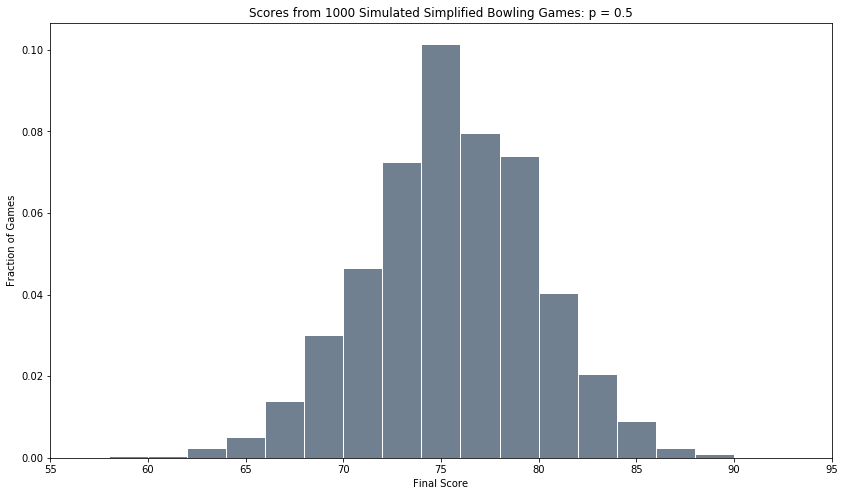

In [4]:
simGames = [bowling_game_simple(0.5) for x in range(1000)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.hist(simGames, ec = 'white', bins = np.arange(0,100,2), color = 'slategrey', density = True)
plt.xlabel('Final Score')
plt.ylabel('Fraction of Games')
plt.xlim(55,95)
plt.title('Scores from 1000 Simulated Simplified Bowling Games: p = 0.5');

Based on the histogram above, there is a clear mean at score = 75. This is consistent with what is expected when p = 0.5. For each frame in a game you would expect to knock down half of the pins on your first roll, so $\frac{10}2 = 5$ pins. You would go into your second roll with 5 pins and again expect to knock down half of those pins, $\frac{5}2 = 2.5$. So in total for each frame you would expect to knock down 7.5 pins. Multiply this expected score per frame by the number of frames, 10, and your expected score per game is 75. 

**Part C:** Build a function `bowling_game` to simulate a more realistic version of a single game of traditional [10-pin bowling](https://en.wikipedia.org/wiki/Ten-pin_bowling).  Here are the additional [rules](https://en.wikipedia.org/wiki/Ten-pin_bowling#Rules_of_play) to add:
* *Generally*, your score for each frame is the total number of pins knocked down by your two rolls.
* If you get a strike, then:
    * you do not get a second roll for that frame, and
    * your score for that frame is the 10 from what you just knocked down _plus_ the total number of pins you knock down on your next 2 rolls.
* If you get a spare, then your score for that frame is the 10 from what you just knocked down _plus_ the number of pins you knock down on your next roll.
* The tenth frame has a few of special rules too:
    * If you get a strike on your first roll, then you are awarded two extra rolls.
    * If you get a spare on your second roll, then you are awarded one extra roll.
    * Your score for the tenth frame is simply the total number of pins knocked down.
    
An example bowling game and the total score will be provided in a "Practicum Q&A" Piazza post.

In [5]:
def count_bowling_score(frames): #counts up score for a given list of frames
    finalScores = [(0,0)]*(len(frames))
    #print(frames)
    for i,x in enumerate(frames):
        currScore = x
        if sum(currScore) == 10 and i < 9: #if spare or strike and not last frame
            if x[0] == 10: #strike
                #print(i, x, frames[i+1], len(frames[i+1]))
                if len(frames[i+1]) >= 2: #if next 2 rolls in next frame
                    currScore.append(frames[i+1][0])
                    currScore.append(frames[i+1][1])
                else: #if next two rolls split between next and next + 1 frames
                    currScore.append(frames[i+1][0])
                    currScore.append(frames[i+2][0])
            else: #spare
                currScore.append(frames[i+1][0])
        finalScores[i] = currScore
    #print(finalScores)
    score = 0
    for x in finalScores:
        score += sum(x)
    return score
                

def bowling_game( p ):
    frames = []
    for i in range(9): #first 9 frames
        pins = 10
        rolls = 0
        currFrame = list()
        while rolls < 2 and pins > 0: 
            knockedDown= np.random.binomial(pins, p)
            pins -= knockedDown
            rolls += 1
            currFrame.append(knockedDown)
        frames.append(currFrame)
    #10th frame
    pins = 10
    rolls = 0
    maxRolls = 2
    currFrame = list()
    while rolls < maxRolls and pins > 0: 
        #print(pins)
        knockedDown= np.random.binomial(pins, p)
        #print(knockedDown)
        if rolls == 0 and knockedDown == 10:
            maxRolls += 1
        elif rolls ==1 and pins == knockedDown:
            maxRolls += 1
            pins = 10
        else:
            pins -= knockedDown
        rolls += 1
        currFrame.append(knockedDown)
    frames.append(currFrame)    
    return count_bowling_score(frames)

**Part D:** Use your `bowling_game` function to simulate 1,000 games of more realistic bowling with $p=0.5$. Plot a density histogram of the scores. Compare the distributions with and without the strike, spare and tenth frame bonuses using concepts from this class. That is, compare your results from Part B with the results here. Write a few sentences commenting on any key differences you see.

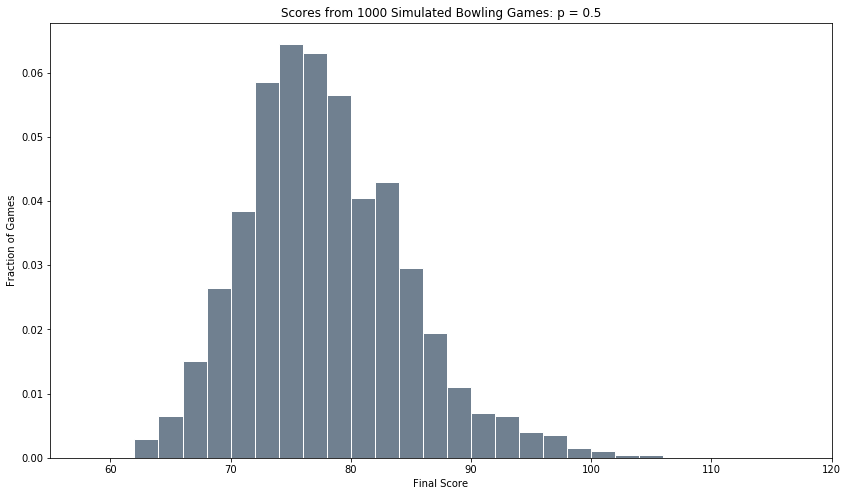

In [6]:
simGames = [bowling_game(0.5) for x in range(1000)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.hist(simGames, ec = 'white', bins = np.arange(0,200,2), color = 'slategrey', density = True)
plt.xlabel('Final Score')
plt.ylabel('Fraction of Games')
plt.xlim(55,120)
plt.title('Scores from 1000 Simulated Bowling Games: p = 0.5');

The histogram above differs from the one in part b most noticeably at higher scores. Specifically, the histogram above is positively skewed while the one in part B is symmetric. The mode is still around 75 however the mean would likely be larger than this value. It makes sense that there would still be the most mass around 75, especially since the expected frames (roll1 = 5, roll2 = 2.5) that would result in that score do not include any spares or strikes so most sets of frames that originally resulted in a score of 75 wouldn't be affected by the additional rules. The distribution here is also more spread out since some of the lower scores that contained any single strike or spare would be adjusted to a higher score when the additional rules are considered, thus redistributing the mass over the larger observed range. 


**Part E:** Compare the effects of the strike, spare and 10th frame bonuses for a better bowler, with $p=0.75$. Include any new simulations, figures and/or statistics that you think are relevant. Write a few sentences to comment on any differences you notice.

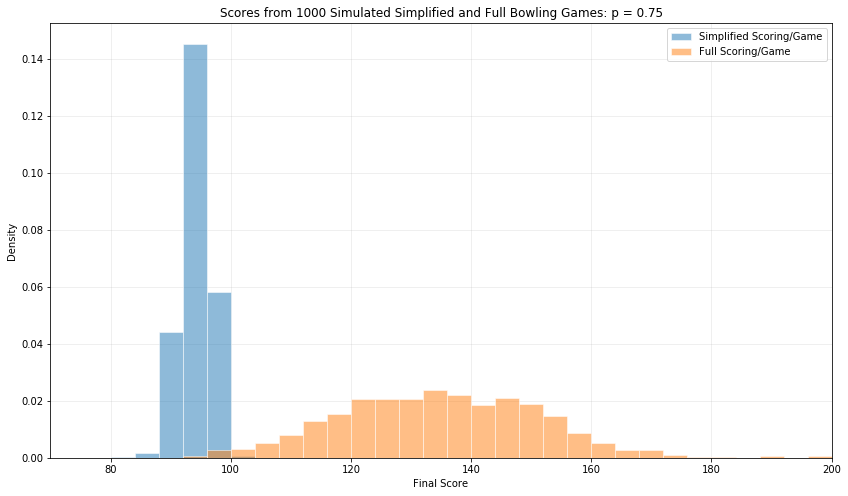

In [7]:
simGamesSimp = pd.Series([bowling_game_simple(0.75) for x in range(1000)])
simGames = pd.Series([bowling_game(0.75) for x in range(1000)])

my_bins = np.arange(0,300,4)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
simGamesSimp.hist(alpha=0.5, bins = my_bins, edgecolor="white", label="Simplified Scoring/Game", density=True)
simGames.hist(alpha=0.5, bins = my_bins,edgecolor="white", label="Full Scoring/Game", density=True)
ax.set_xlabel('Final Score')
ax.set_ylabel('Density')
ax.set_xlim(70,200)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.title('Scores from 1000 Simulated Simplified and Full Bowling Games: p = 0.75');
plt.legend()
plt.show();

In [8]:
print("Simple Game Mean (p = 0.75): ",simGamesSimp.mean() )
print("Game Mean (p = 0.75): ",simGames.mean() )

Simple Game Mean (p = 0.75):  93.711
Game Mean (p = 0.75):  134.292


The simulations with the more complicated scoring/game has a much broader and higher distribution (mean score = 134), while the simple game is clustered more tightly around a lower mean (mean score = 94). The shape of the more complicated game's distribution is becoming more normal, likely because the probability of the other rules and scoring applying to any game is much higher so the set of factors determing the final score is more complicated. Both distributions are still well below the maximum score of 300. Clearly the probability mass is being redistributed over a wider range according to the more complicated rules, such that there is no longer a tight clustering of the mass about the mean score. 

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [25 points] Problem 2: Absenteeism at work

The data set [`Absenteeism_at_work.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2ujdkm674tf) (linked here, and on Piazza) examines a variety of factors surrounding employees at a courier in Brazil between 2007 and 2010. The data include characteristics of the employees like education, age, number of children and pets, and so on, as well as the amount of time absent from work (hours) each occurrence. A file describing the data set is available from the UC Irvine repository, as well as [linked on Piazza](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2uj0fzds4t9) under Resources, alongside the data set.

**Part A**:  Load the data set `Absenteeism_at_work.csv` as a Pandas data frame and use Pandas rename all of the columns to concise, descriptive, single-word column titles. Use Pandas built-in methods to display the first few rows and the column titles of your new and improved data frame.

In [9]:
file = "https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2ujdkm674tf"
df = pd.read_csv(file, delimiter = ';')
df.head()
columns = df.columns.values.tolist()
print(columns)

['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [10]:
print('DataFrame with Simplified Column Titles:')
rename = {'Reason for absence': 'Reason','Month of absence':'Month', 'Day of the week':'Weekday','Transportation expense':'Transportation','Distance from Residence to Work':"Distance",'Service time':'Service','Work load Average/day ': 'Work/Day','Hit target':'Hit','Disciplinary failure':'Disciplinary', 'Social drinker':'Drinker', 'Social smoker': 'Smoker', 'Body mass index': 'BMI','Absenteeism time in hours':'Absenteeism'   }
df = df.rename(index=str, columns=rename)
df.head()

DataFrame with Simplified Column Titles:


,ID,Reason,Month,Weekday,Seasons,Transportation,Distance,Service,Age,Work/Day,...,Disciplinary,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absenteeism
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


**Part B**: Is any one day of the week more/less likely for employees to be absent at work on that day? Fully justify your response using statistical techniques from this class.

**Solution Part B**

For the first part, will test whether we can reject the null hypothesis, where the null hypothesis is that the average hours absentee (absenteeism column) for all the days are equal. To test this will use a one way ANOVA. For the ANOVA our null and alternative hypothesis are:

$H_0 : \mu_2 = \mu_3 =\mu_4 = \mu_5 = \mu_6$

$H_1 : \mu_i \neq \mu_j $ for some pair of days i and j $\in \{2,3,4,5,6\}$

Will test at the $\alpha = 0.05$ significance level. 

In [11]:
possibleDays = df.Weekday.unique()
allDays = {}
means = []
for day in possibleDays:
    dfDay = df.loc[df['Weekday']==day]['Absenteeism']
    allDays[day] = dfDay
    means.append((day, dfDay.mean()))

F, pval = stats.f_oneway(allDays[2],allDays[3],allDays[4],allDays[5],allDays[6])
print("F = {:.5f}".format(F))
print("pval = {:.5f}".format(pval))

F = 3.27082
pval = 0.01135


Since the p-value above is less than our $\alpha$ then we can reject the null hypothesis that the mean absentee hours per day is the same for all the days. However, this does not tell us which day(s) is(are) significantly different. To find the significantly different pairs of day(s) will use Tukey's HST.

In [12]:
from statsmodels.stats.multicomp import MultiComparison

In [13]:
labels = []
data = []
for day in allDays:
    labels += [day]*allDays[day].count()
    for x in allDays[day]:
        data.append(x)

mc = MultiComparison(data, labels)
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  2      3    -1.2679  -5.3519  2.816  False 
  2      4     -2.101  -6.1716  1.9695 False 
  2      5    -4.8244  -9.1437 -0.5051  True 
  2      6    -4.1234  -8.2792  0.0323 False 
  3      4    -0.8331  -4.9489  3.2827 False 
  3      5    -3.5565  -7.9185  0.8055 False 
  3      6    -2.8555  -7.0557  1.3446 False 
  4      5    -2.7234  -7.0729  1.626  False 
  4      6    -2.0224  -6.2096  2.1647 False 
  5      6     0.701   -3.7283  5.1303 False 
---------------------------------------------


Will perform a z-test for each individual day against the mean of all the others at the $\alpha = 0.10$ level (two-tailed). Expect that day 2 or 5 may be significantly different than the rest if you include the other one in the population. Some of the other days may also be significantly different, like 6 which has a the third largest difference of all the comparisons when compared to 2. 

$H_0 : \mu_{day} - \mu_{otherDays} = 0$

$H_1 : \mu_{day} - \mu_{otherDays} \neq 0$

In [14]:
alpha = 0.10
for day in allDays:
    populationMean = df.loc[df['Weekday'] != day]['Absenteeism'].mean()
    populationSTDEV = df.loc[df['Weekday'] != day]['Absenteeism'].std()
    n = len(df.loc[df['Weekday'] != day])
    z = (np.mean(allDays[day])-populationMean)/np.sqrt(np.std(allDays[day])**2/len(allDays[day])+populationSTDEV**2/n)
    pval = stats.norm.cdf(z)
    minPval = min(pval, 1-pval)
    Upper = minPval == 1-pval
    significant = minPval <= alpha/2
    print('Weekday: ', day,  '\nP-value: ', round(minPval,2))
    print('Significantly Different?: ', significant)
    if significant:
        if Upper:
            print('Significantly Larger or Smaller?: Larger')
        else:
            print('Significantly Larger or Smaller?: Smaller')

Weekday:  3 
P-value:  0.19
Significantly Different?:  False
Weekday:  4 
P-value:  0.41
Significantly Different?:  False
Weekday:  5 
P-value:  0.0
Significantly Different?:  True
Significantly Larger or Smaller?: Smaller
Weekday:  6 
P-value:  0.01
Significantly Different?:  True
Significantly Larger or Smaller?: Smaller
Weekday:  2 
P-value:  0.01
Significantly Different?:  True
Significantly Larger or Smaller?: Larger


So, comparing each one individually to all the rest using two-tailed z-tests with a significance level of $\alpha = 0.10$, days 2, 5, and 6 are significantly different as shown above. However, the data seems to follow a trend, so splitting up the data in this way loses that information. Day of week and average absenteeism seem to be negatively correlated (see the plot below). Looking at this plot, day 5 seems significantly different since it deviates most from the trendline. 

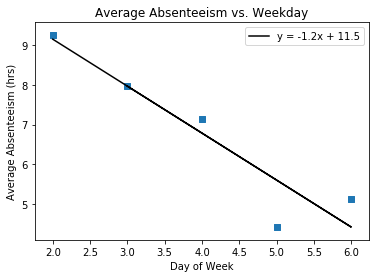

In [15]:
results = stats.linregress([x[0] for x in means], [x[1] for x in means])
plt.plot([x[0] for x in means], [(results[0]*x[0]+results[1]) for x in means], label = 'y = -1.2x + 11.5', color = 'black')
plt.scatter([x[0] for x in means], [x[1] for x in means], marker = 's')
plt.xlabel('Day of Week')
plt.ylabel('Average Absenteeism (hrs)')
plt.title('Average Absenteeism vs. Weekday')
plt.legend()
plt.show();

**Part C**: How many distinct employees are represented in the data set? Show in Python how you calculated this (opening and counting in Excel or a text editor is not an option).

In [16]:
uniqueIDs = df.ID.unique()
print("Number of unique employee IDs: ", len(uniqueIDs))

Number of unique employee IDs:  36


**Part D**: Create a new data frame with only one row corresponding to each employee. Include the original employee ID, as well as these columns, that we might want to investigate further:
* total number of absences
* total time of absences
* distance to work
* age
* number of children
* whether they are a social drinker
* whether they are a social smoker
* number of pets

In [17]:
simpleDict = {'ID':uniqueIDs, 'TotAbsences':[], 'SumAbsences':[], "Distance":[], 'Age':[], 'Children':[], 'Drinker':[], "Smoker":[], "Pets":[]}
keys = list(simpleDict.keys())[1:]

for ID in uniqueIDs:
    currEmp = df.loc[df['ID'] == ID]
    #print(currEmp['Distance'])
    currEmpDetails = (sum(currEmp['Absenteeism'] > 0), sum(currEmp['Absenteeism']), currEmp['Distance'].mean(), currEmp['Age'].mean(),  currEmp['Son'].mean(), currEmp['Drinker'].mean(), currEmp['Smoker'].mean(), currEmp['Pet'].mean())
    for i,key in enumerate(keys):
        simpleDict[key].append(currEmpDetails[i])
#print(simpleDict)
dfSimple = pd.DataFrame(simpleDict, index = list(range(36)))
dfSimple.head()

,ID,TotAbsences,SumAbsences,Distance,Age,Children,Drinker,Smoker,Pets
0,11,38,450,36.0,33.0,2.0,1.0,0.0,1.0
1,36,28,311,13.0,50.0,1.0,1.0,0.0,0.0
2,3,112,482,51.0,38.0,0.0,1.0,0.0,0.0
3,7,4,30,5.0,39.0,2.0,1.0,1.0,0.0
4,10,24,186,52.0,28.0,1.0,1.0,0.0,4.0


**Part E:**  One might hypothesize that employees with pets would be absent from work more often than employees without pets. Use an appropriate statistical technique to obtain 95% confidence interval for the difference in mean total time absent for the employees with pets and those without pets. What can you conclude?

**Solution Part E:**

Will need to compare the set of employees with pet to those without. Since the size of these susbets is likely less than 30 each since there are only 36 unique employees (confirmed below, see output), will use a t-value to compute our 95% CI.

$$CI = (\mu_{pets}-\mu_{noPets}) \pm t  \sqrt{\sigma_{pets}^2/n_{pets} + \sigma_{noPets}^2/n_{noPets}}$$


In [18]:
alpha = 0.05
dfPets = dfSimple.loc[dfSimple['Pets'] > 0]
dfNoPets = dfSimple.loc[dfSimple['Pets'] == 0]
muPets = dfPets['SumAbsences'].mean()
muNoPets = dfNoPets['SumAbsences'].mean()
sPets = dfPets['SumAbsences'].std()
sNoPets = dfNoPets['SumAbsences'].std()
nPets = len(dfPets)
nNoPets = len(dfNoPets)
print("Pet Subset Size: ", nPets)
print("No Pet Subset Size: ", nNoPets)
t = stats.t.ppf(1-alpha/2, (nPets-1 + nNoPets -1))
L,U = (muPets-muNoPets) - t*np.sqrt(sPets**2/nPets + sNoPets**2/nNoPets), (muPets-muNoPets) + t*np.sqrt(sPets**2/nPets + sNoPets**2/nNoPets)


print("95% Confidence Interval: [", round(L,2),",",round(U,2), "]")

Pet Subset Size:  17
No Pet Subset Size:  19
95% Confidence Interval: [ -148.6 , 51.27 ]


From our 95% CI interval we cannot conclude that there is a significant difference in mean hours absent from work between employees who own pets and those who do not. Since the CI interval contains 0, the interval contains the possibility that $\mu_{pets}=\mu_{noPets}$.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file [`sharknadoes.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2uiqgi2l4t6) (linked here, and on Piazza). 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pressure}$: local air pressure (millibar)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{shark attacks}$: the number of shark attacks on the day of observation

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [19]:
dfSharks = pd.read_csv('https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jjd2uiqgi2l4t6')
#no rows are missing data
dfSharks.head()

,temperature,clouds,humidity,pressure,earthquake,taunts,shark attacks,ice cream sold,sharknado hazard
0,78.0,1.00,86.41,847.12,7.1,15.0,2.0,273.0,40.22
1,89.0,1.00,96.67,844.34,7.4,20.0,4.0,184.0,36.42
2,65.0,1.00,53.85,839.48,7.0,0.0,9.0,141.0,19.54
3,36.0,0.13,88.72,851.28,7.9,34.0,2.0,146.0,85.00
4,72.0,1.00,63.08,852.67,7.5,6.0,2.0,178.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

**Solution Part B**

Will perform an F-test by fitting our data to an ordinary least squares model. The hypotheses we're testing for our p different features are:

$H_0 : \beta_1 = \beta_2 =... =\beta_p = 0$

$H_1 : \beta_i \neq 0 $ for some feature i

If the probability associated with the F-statistics is $\leq \alpha$ then at least one feature is significantly related to the response. 

In [20]:
y, X = dfSharks["sharknado hazard"], dfSharks.iloc[:,:-1]
X = sm.add_constant(X)
modelFull = sm.OLS(y, X).fit() 
modelFull.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     347.2
Date:                Mon, 10 Sep 2018   Prob (F-statistic):           1.44e-56
Time:                        14:06:39   Log-Likelihood:                -209.89
No. Observations:                  85   AIC:                             437.8
Df Residuals:                      76   BIC:                             459.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2547.5254     59.894    -42.534      0.000   -2666.815   -2428.236
temperature       -0.4415      0.046     -9.598      0.000      -0.533      -0.350
clouds            -0.2182      2.356     -0.093      0.926      -4.911       4.475
humidity           0.0134      0.023      0.581      0.563      -0.033       0.060
pressure           3.0696      0.071     43.021      0.000       2.927       3.212
earthquake         2.2193      0.419      5.292      0.000       1.384       3.055
taunts             0.3091      0.036      8.533      0.000       0.237       0.381
shark attacks     -0.0336      0.136     -0.247      0.806      -0.305       0.237
ice cream sold     0.0068      0.007      0.972      0.334      -0.007       0.021
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.162
Skew:                           0.093   Prob(JB):                        0.922
Kurtosis:                       3.105   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $Prob(F-statistic) \approx 0 \leq 0.01$ so we can reject the null hypothesis and conclude that at least one feature is significant.

**Part C**: 

*First,* write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the maximum number of desired features, and returns a list of feature names corresponding to the `maxk` most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$.

*Second,* use your function to determine the best $k=4$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection.

In [21]:
#helper function to find SSE from R^2 and SST
def getSSE(r_squared, SST):
    return (1-r_squared)*SST


def forward_select(df, resp_str, maxk):
    finalFeatures = ['const'] #store the maxk features whose inclusion result in lowest SSE
    
    response = df[resp_str] #y values
    y_bar = response.mean()
    sst = sum([(y - y_bar)**2 for y in response])
    
    #prepare features
    features = df[df.columns.difference([resp_str])]
    features = sm.add_constant(features)
    featureColumns = features.columns.values.tolist()
    
    minSSE = sst + 1 #use to find best single feature
    bestFeature = ''
    #print(featureColumns)
    
    #SLR for each feature alone
    for feature in featureColumns:
        X = features.loc[:, feature]
        slrCurr = stats.linregress(features[feature],response)
        currSSE = getSSE(slrCurr.rvalue**2, sst)
        #print(feature, slrCurr.rvalue**2)
        if currSSE < minSSE:
            minSSE = currSSE
            bestFeature = feature
    finalFeatures.append(bestFeature)
    
    #repeat MLR's with remaining features until maxk features in finalFeatures list
    while len(finalFeatures)-1 < maxk:
        for feature in featureColumns:
            if feature not in finalFeatures:
                currFeats = finalFeatures.copy()
                currFeats.append(feature)
                X = features.loc[:, currFeats]
                model = sm.OLS(response, X).fit()
                #print(feature, model.rsquared)
                currSSE = getSSE(model.rsquared, sst)
                if currSSE < minSSE: 
                    minSSE = currSSE
                    bestFeature = feature
        finalFeatures.append(bestFeature)   
    
    return finalFeatures[1:maxk+1]



In [22]:
#part ii
features = forward_select(dfSharks, 'sharknado hazard', 4)
print('Forward Selection Features: ')
print('Order: ', ['First', 'Second', 'Third', 'Fourth'])
print('Features: ', features)

Forward Selection Features: 
Order:  ['First', 'Second', 'Third', 'Fourth']
Features:  ['pressure', 'temperature', 'taunts', 'earthquake']


/Users/astrangedoor/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/astrangedoor/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

In [23]:
#Calculate parameters
y, X = dfSharks["sharknado hazard"], dfSharks.loc[:,features]
X = sm.add_constant(X)
modelReduced = sm.OLS(y, X).fit() 
print('Feature Coefficients')
print(modelReduced.params)

Feature Coefficients
const         -2557.160218
pressure          3.083051
temperature      -0.423575
taunts            0.315070
earthquake        2.064030
dtype: float64


The model based on the above is (with parameters rounded to 2 decimal places):

$$ y = -2557.16 + 3.08\times P + (-0.42)\times T + 0.32\times Z + 2.06\times E $$

Where P, T, Z, and E are the respective feature variables for pressure, temperature, taunts, and earthquakes. 

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

**Solution Part E** 

Will perform a partial F-test comparing the full (p features) and reduced (k features) models.

$H_0 : \beta_1 = \beta_2 =... =\beta_{p-k} = 0$ for the remaining p-k features

$H_1 : \beta_i \neq 0 $ for one of the remaining p-k features

Will calculate the F-statistic as follows:

$$ F = \frac{(SSE_{reduced}-SSE_{full})/(p-k)}{SSE_{full}/(n-p-1)}$$

Will reject $H_0 $ in favor of $H_1$ if $F \geq F_{\alpha, p-k, n-p-1}$

In [24]:
#F-Test
alpha = 0.01
response = dfSharks['sharknado hazard'] #y values
y_bar = response.mean()
sst = sum([(y - y_bar)**2 for y in response])
n = len(response)

features = dfSharks[dfSharks.columns.difference(['sharknado hazard', 'const'])]
featureColumns = features.columns.values.tolist()
p = len(featureColumns)
k = 4

#Get SSE values for the full and reduced 
SSE_full = getSSE(modelFull.rsquared, sst)
SSE_red = getSSE(modelReduced.rsquared, sst)


#Calculate test statistic F

F = ((SSE_red-SSE_full)/(p-k))/(SSE_full/(n-p-1))

F_alpha = stats.f.ppf(1-alpha, p-k, n-p-1)
print('Test Statistic F:',  round(F, 2))
print('F_alpha: ', round(F_alpha, 2))


Test Statistic F: 0.33
F_alpha:  3.58


Our F value is far below the $F_{\alpha, p-k, n-p-1}$ so we cannot reject the null hypothesis, which is that the features not included in the reduced have coeficients equal to 0. If you look at the full model coefficients for the features missing in the reduced model there are all close to 0. The full and reduced models are not significantly different and the missing features are not important, so we should use the reduced model to avoid including extraneous features. 

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{temperature}$: 67 degrees F
- $\texttt{clouds}$: 0.8
- $\texttt{humidity}$: 83
- $\texttt{pressure}$: 850 millibar 
- $\texttt{earthquake}$: 7
- $\texttt{taunts}$: 47
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120

In [25]:
coefficients = modelReduced.params
variables = {'const': 1,'pressure': 850, 'temperature': 67, 'taunts': 47, 'earthquake': 7}
keys = list(variables.keys())
y = 0
for key in keys:
    y += coefficients[key]*variables[key]
print('Using the reduced model, y = ', round(y,2))

Using the reduced model, y =  64.31


<br>

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4:  Dealer's Choice

For this problem, you may use a data set of your choosing. It must **not** be a data set used for any of the in-class notebooks, homework problem sets, or used in the rest of this practicum. 

**Part A:** 

1. Give a few sentences summarizing your data set. Provide a few details about where you found it, when it was collected, who/what the sample population was, and what the key quantities of interest are.
2. Also provide a hyperlink **and citation** to any relevant scientific paper. Most data sets include a "cite this work as" suggestion.
3. Then, clearly state a research question that you would like to answer using the data set.  For example, "Is a random bottle of red or white wine more likely to have a quality of 5 or higher?"

**Solution Part A**
1. 

The data set is the *homo sapiens* reference proteome (set of known proteins, so the genome of proteins). The data is FASTA formatted, so each sequnce has a header line marked with a '>' that contains some identifying information about the sequence, *e.g.*, protein name, gene name, origin species, level of evidence for this protein (coded), etc. Following the header line is the protein sequence written using the single letter amino acid codes. 

2. https://www.uniprot.org/proteomes/UP000005640#
To cite UniProt, cite latest publication:
The UniProt Consortium 
UniProt: the universal protein knowledgebase 
Nucleic Acids Res. 45: D158-D169 (2017)
I will compare this database to a selected set of 167 human protein sequences. 

3. Does my sample set of proteins differ from the human reference proteome significantly. In particular, are the observed frequencies of the 20 common amino acids in the 167 sequence subset significantly different than the frequencies from an similar subset taken from the human reference proteome? Aggregate statistics are released for the whole proteome, however it would be more biologically relevant to compare my subset to a subset with the same range of lengths since size would probably affect amino acid frequencies (*e.g.*, higher frequencies of hydrophobic amino acids in large, globular proteins than in small, unstructured proteins). The range of sequence lengths in the sample set is 20-70, while the range in the uniprot data set is presumably much larger (probably 5-2500+).

**Part B:** Read in data set, and perform any cleaning that is necessary. Write a sentence or two to describe any fill-values or missing data and how you dealt with them. If the data set is fine as-is, just say so and thank your lucky stars somebody else took the time to clean it.

In [26]:
#read in my file of 167 sequences
myFile = pd.read_csv('https://drive.google.com/uc?export=download&id=1EHGhOt8zJaD6SYIlvRDhIfHDIPrdzvMH',  header = None)
myFileSeqsOnly = pd.DataFrame([myFile.iloc[x] for x in list(range(1,len(myFile), 2))]) #get rid of rows with names not sequences


In [27]:
#read in UniProt file of all human proteins in their database
f = open('uniprot-proteome%3AUP000005640.fasta','r')
allLines = f.readlines()  

In [28]:
allHsapSeqs = []
currSeq = ''

for line in allLines:
    if line[0] != '>':
        currSeq += line.strip('\n')
    else:
        allHsapSeqs.append(currSeq)
        currSeq = ''

allHsapSeqs.append(currSeq) #get last sequences, which has no '>' line following it
allHsapSeqs.pop(0) #pop off blank first item in list

#Check I have all the sequences

print("Expected number of sequences: 73112")
print("Number of sequences read from file:", len(allHsapSeqs))


Expected number of sequences: 73112
Number of sequences read from file: 73112


Had to parse the FASTA format. For my small subset, each sequence had a simple header followed by the sequence. Just wanted the sequence so had to alternate which rows were included in my final data set. For the UniProt data set of proteins, not only did the sequences have longer headers, but the sequences were split over multiple lines depending on their length, so had to specially read in each line, concatenating contiguous sequence segments. 

Header information won't be used so it is thrown out. 

**Part C:** Perform some exploratory data analysis on your data set. Explain in Markdown/MathJax what you are doing and why. Include any summary statistics or figures that you believe will be helpful to build a case for the analysis you will do in Part D, to answer the research question from Part A. For example:
* What are we going to look at, and why?
* What techniques are we going to use, and why?
* Can you provide some figures or statistics to justify the kind of relationship you hypothesized in Part A?

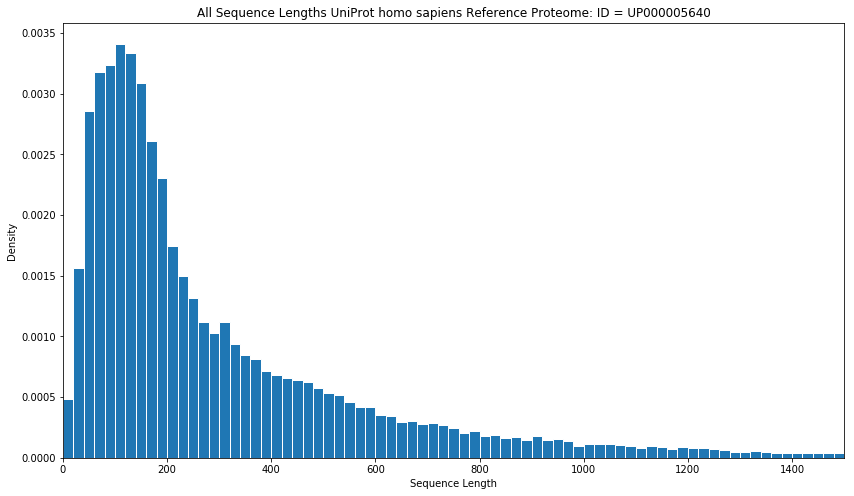

In [29]:
#First, will look at distribution of lengths, since my sequences are only 20-70 amino acids
allHsapSeqs_lengths = [len(x) for x in allHsapSeqs]
mySet_lengths = [len(x) for x in myFileSeqsOnly[0]]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.hist(allHsapSeqs_lengths, bins = range(0,7500, 20), density = True, ec = 'white')
plt.xlim(0,1500)
plt.xlabel('Sequence Length')
plt.ylabel('Density')
plt.title('All Sequence Lengths UniProt homo sapiens Reference Proteome: ID = UP000005640')
plt.show();


(^^^^Could be log-normal...which is cool, but not relevant to what I am doing here)

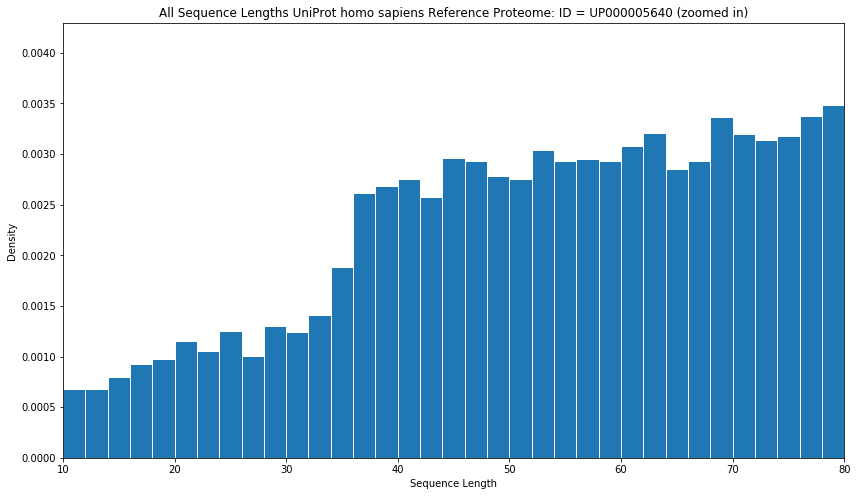

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.hist(allHsapSeqs_lengths, bins = range(0,7500, 2), density = True, ec = 'white')
plt.xlim(10, 80)
plt.xlabel('Sequence Length')
plt.ylabel('Density')
plt.title('All Sequence Lengths UniProt homo sapiens Reference Proteome: ID = UP000005640 (zoomed in)')
plt.show();

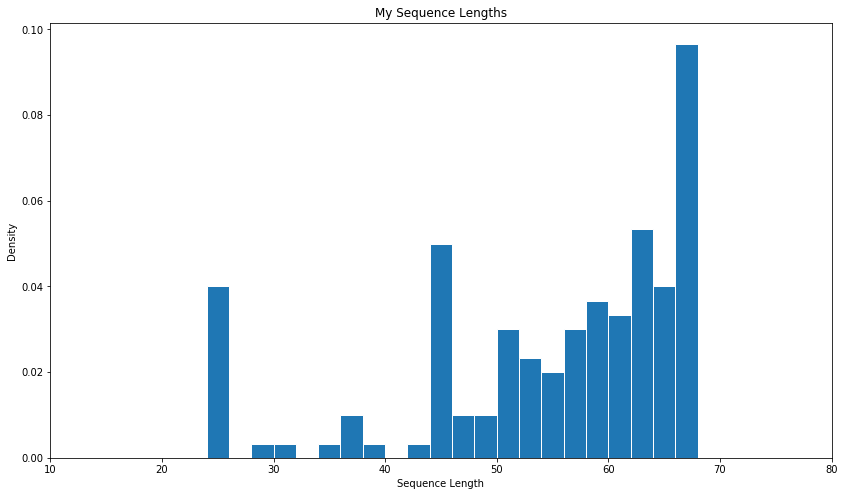

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.hist(mySet_lengths, bins = range(0,70, 2), density = True, ec = 'white')
plt.xlim(10,80)
plt.xlabel('Sequence Length')
plt.ylabel('Density')
plt.title('My Sequence Lengths')
plt.show();


Clearly most of the sequences that UniProt includes when they report their frequency statistics are much larger than 20-70 amino acids in length (see below, only 12% of the sequence in the reference proteome are in the length range I want).

Looking at the length distributions above, my set of proteins doesn't have the same distribution between 20 and 70 aa as the reference proteome. There are some modes in my set that don't appear in the reference set, so the types of proteins in my set are liekly different than any random set in the same range you might see pulling from the reference set. Based on some of the unusual features of my distribution (in particular the population at ~25 aa), I might have a significantly different set of proteins compared to all human proteins and thus the aa frequencies may be statistically significantly different for my set. 

In [120]:
#Create data frame with just reference proteins in target length range, 20 to 70 aa
allRefProt = pd.DataFrame({'seq':allHsapSeqs, 'seqLength': allHsapSeqs_lengths})
shortRefProt = pd.DataFrame({'seq':allHsapSeqs, 'seqLength': allHsapSeqs_lengths})
shortRefProt = shortRefProt.loc[(shortRefProt['seqLength']>= 20) & (shortRefProt['seqLength']<= 70)]
shortRefProt.head()
print("Fraction of Reference Sequences in range on interest: " ,round(len(shortRefProt)/73112, 2))

Fraction of Reference Sequences in range on interest:  0.12


In [121]:
#create data frame with my set of proteins and their lengths
mySet = pd.DataFrame({'seq': myFileSeqsOnly[0], 'seqLength': mySet_lengths})
mySet.head()

,seq,seqLength
1,MSATNNIAQARKLVEQLRIEAGIERIKVSKAASDLMSYCEQHARND...,68
3,MPRKIEEIKDFLLTARRKDAKSVKIKKNKDNVKFKVRCSRYLYTLV...,70
5,MVITSENDEDRGGQEKESKEESVLAMLGIIGTILNLIVIIFVYIYTTL,48
7,MDTSRVQPIKLARVTKVLGRTGSQGQCTQVRVEFMDDTSRSIIRNV...,69
9,MVAYWRQAGLSYIRYSQICAKAVRDALKTEFKANAEKTSGSNVKIV...,51


In [122]:
#function to get frequency of amino acids given dataframe with sequences and lengths
def getAAcounts(dfSeqs):
    aaSingleL = ['I', 'L', 'V', 'F', 'M', 'C', 'A', 'G', 'P', 'T', 'S', 'Y', 'W', 'Q', 'N', 'H', 'E','D','K','R']
    aaCounts = 20*[0]
    aaFrequency = []
    #print(dfSeqs.columns)
    totalAA = sum(dfSeqs['seqLength'])
    for seq in dfSeqs['seq']:
        for i,x in enumerate(aaSingleL):
            aaCounts[i] += seq.count(x)
    for i,x in enumerate(aaCounts):
        aaFrequency.append(x/totalAA)
    return aaSingleL, aaFrequency, totalAA


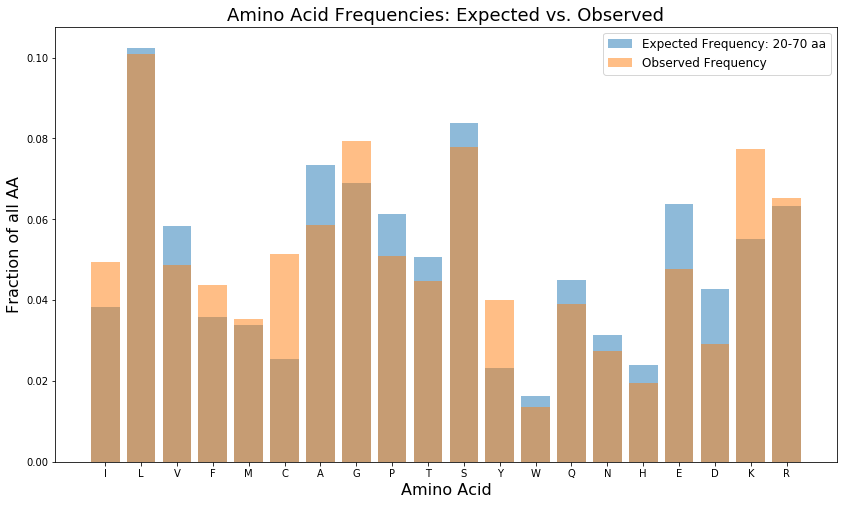

In [140]:
refSet_freq = getAAcounts(shortRefProt)
mySet_freq = getAAcounts(mySet)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.bar(refSet_freq[0],refSet_freq[1],alpha=0.5,  label="Expected Frequency: 20-70 aa")
plt.bar(mySet_freq[0], mySet_freq[1], alpha=0.5, label="Observed Frequency")
plt.xlabel('Amino Acid', size = 16)
plt.ylabel('Fraction of all AA',size = 16)
plt.title('Amino Acid Frequencies: Expected vs. Observed', size = 18)
plt.grid(alpha=0)
plt.legend(fontsize = 'large')
plt.show();

fig.savefig('exp20to70aa_v_obs.png') 

Visually, in the bar graph above, some amino acids, such as Cysteine, look like they could significantly differ between the two sets, however this needs to be confirmed statistically.

**Part D:** Answer your research question proposed in Part A by carrying out at least one of the following.
* confidence interval test
* hypothesis test
* linear regression (single or multivariate), including inference for coefficients

Write a few sentences to summarize your findings. Include one sentence that clearly states your conclusion.

Will perform two-tailed z-tests ($\alpha = 0.05$, cause why not) to compare the frequencies (so proportions) for each amino acid. 

$H_0: p_{aa,obs} - p_{aa,exp} = 0 $ and $H_1: p_{aa,obs} - p_{aa,exp} \neq 0$ where obs = the observed frequences in my set and exp = the expected frequencies based on the reference proteome and aa is the single letter code of the respective amino acid being tested.

So the standardized test-statistic, z, is given by:

$$ z = \frac{\hat p_{aa,obs} - \hat p_{aa,exp}-0}{\sqrt{\frac {\hat{p_{aa,obs}}(1-\hat{p_{aa,obs}})}{n_{aa,obs}} + \frac {\hat{p_{aa,exp}}(1-\hat{p_{aa,exp}})}{n_{aa,exp}}}}$$

The n values above are the total amino acids in the respective set (so sum of all the sequence lengths).

If $z_{\alpha/2} \leq z \leq z_{1-\alpha/2}$ then z is in the rejection range and the null hypothesis can be rejected in favor of the alternative hypothesis.


In [36]:
alpha = 0.05
n_exp = refSet_freq[2]
n_obs = mySet_freq[2]
z_upper = stats.norm.ppf(1-alpha/2)
z_lower = -z_upper
for i,exp in enumerate(refSet_freq[1]):
    dif_p = mySet_freq[1][i] - exp
    sigma_p = np.sqrt((mySet_freq[1][i]*(1-mySet_freq[1][i]))/n_obs + (exp*(1-exp))/n_exp)
    z = dif_p/sigma_p
    #print(refSet_freq[0][i],z_lower,  z, z_upper)
    if z <= z_lower:
        print(refSet_freq[0][i], " has a significantly lower frequency in my set")
        print('\tP-value: ', stats.norm.cdf(z))
    elif z >= z_upper:
        print(refSet_freq[0][i], " has a significantly higher frequency in my set")
        print('\tP-value: ', stats.norm.cdf(1-z))
    else:
        print(refSet_freq[0][i], " is not significantly different, cannot reject the null hypothesis")

    

I  has a significantly higher frequency in my set
	P-value:  4.239665830614098e-05
L  is not significantly different, cannot reject the null hypothesis
V  has a significantly lower frequency in my set
	P-value:  1.001963615696582e-05
F  has a significantly higher frequency in my set
	P-value:  0.0034058004014577152
M  is not significantly different, cannot reject the null hypothesis
C  has a significantly higher frequency in my set
	P-value:  3.9936455038370016e-25
A  has a significantly lower frequency in my set
	P-value:  7.392539303570245e-10
G  has a significantly higher frequency in my set
	P-value:  0.0030860824945980214
P  has a significantly lower frequency in my set
	P-value:  2.448563085915471e-06
T  has a significantly lower frequency in my set
	P-value:  0.0029912205788842823
S  has a significantly lower frequency in my set
	P-value:  0.014489583850925487
Y  has a significantly higher frequency in my set
	P-value:  2.3657401361809304e-13
W  has a significantly lower frequen

The findings for each amino acid are listed above. For almost all of the amino acids (except for R, M, and L) there was a significant difference in the frequency in my set vs. the reference set. The p-values from each of these z-tests are quite low, so the probability that these are false positives is also very low. So, based on amino acid composition alone, my set is significantly different than the set of all proteins of the same length in the reference human proteome. 

<br>

---
[Back to Problem 3](#p3)

<a id='footnote'></a> Yeah yeah - fresh water versus salt water - I know, I know. But sharknadoes also are not real, so...

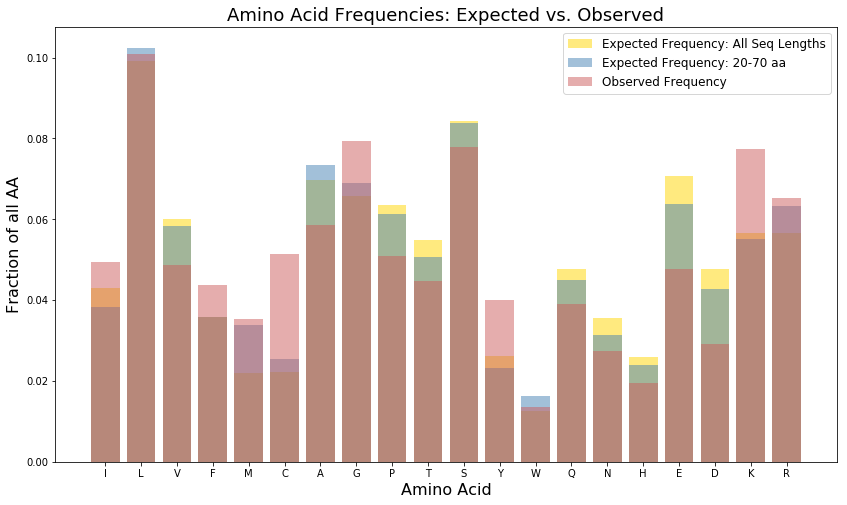

In [138]:
expectedFreq ={
'A':  8.25,  
'R':  5.53 ,
'N':  4.06  ,
'D':  5.45  ,
'C':  1.37  ,
'Q':  3.93  ,
'E':  6.75  ,
'G':  7.07  ,
'H':  2.27  ,
'I':  5.96  ,
'L':  9.66  ,
'K':  5.84  ,
'M':  2.42  ,
'F':  3.86  ,
'P':  4.70  ,
'S':  6.56  ,
'T':  5.34  ,
'W':  1.08  ,
'Y':  2.92  ,
'V':  6.87  
}
x = []
y = []
for aa in refSet_freq[0]:
    x.append(aa)
    y.append(expectedFreq[aa]/100)
allrefSet_freq = getAAcounts(allRefProt)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.bar(x,allrefSet_freq[1],alpha=0.5, color = 'gold', label="Expected Frequency: All Seq Lengths")
plt.bar(refSet_freq[0],refSet_freq[1],alpha=0.5,color = 'steelblue',  label="Expected Frequency: 20-70 aa")
plt.bar(mySet_freq[0], mySet_freq[1], alpha=0.5,color = 'indianred', label="Observed Frequency")
plt.title('Amino Acid Frequencies: Expected vs. Observed', size = 18)
plt.xlabel('Amino Acid', size = 16)
plt.ylabel('Fraction of all AA', size = 16)
plt.grid(alpha=0)
plt.legend(fontsize = 'large')
plt.show();

fig.savefig('exp_v_obs_allLenInOne.png') 

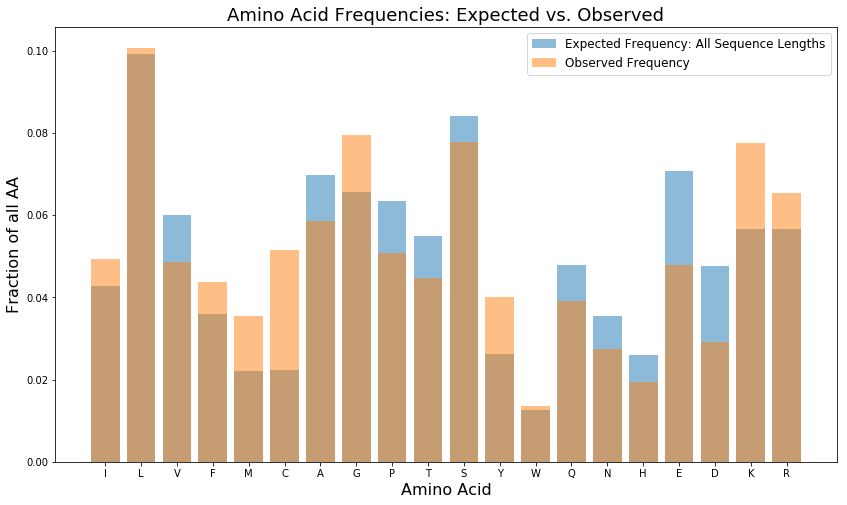

In [135]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.bar(refSet_freq[0],allrefSet_freq[1],alpha=0.5,  label="Expected Frequency: All Sequence Lengths")
plt.bar(mySet_freq[0], mySet_freq[1], alpha=0.5, label="Observed Frequency")
plt.xlabel('Amino Acid', size = 16)
plt.ylabel('Fraction of all AA',size = 16)
plt.title('Amino Acid Frequencies: Expected vs. Observed', size = 18)
plt.grid(alpha=0)
plt.legend(fontsize = 'large')
plt.show();

fig.savefig('expAllLengths_v_obs.png') 

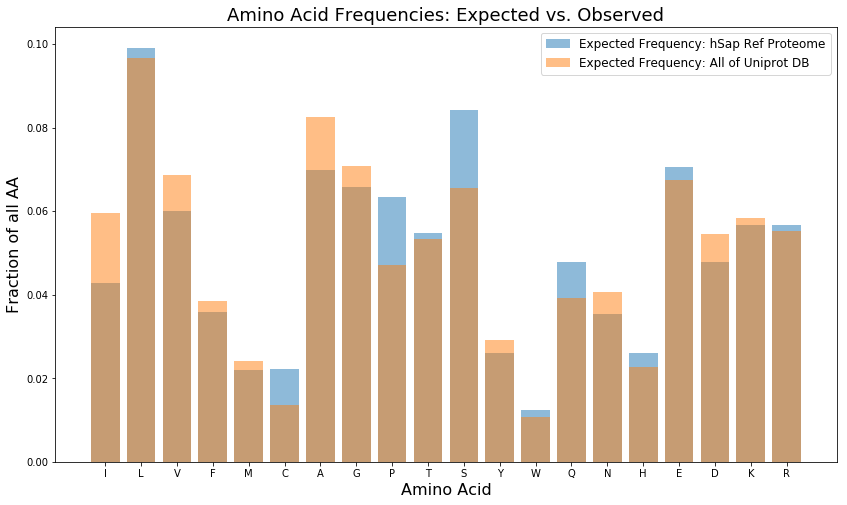

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.bar(refSet_freq[0],allrefSet_freq[1],alpha=0.5,  label="Expected Frequency: hSap Ref Proteome")
plt.bar(mySet_freq[0], y, alpha=0.5, label="Expected Frequency: All of Uniprot DB")
plt.xlabel('Amino Acid', size = 16)
plt.ylabel('Fraction of all AA',size = 16)
plt.title('Amino Acid Frequencies: Expected vs. Observed', size = 18)
plt.grid(alpha=0)
plt.legend(fontsize = 'large')
plt.show();

In [131]:
print(x, mySet_freq[0], refSet_freq[0])

    
obsMinExp_all = np.array(mySet_freq[1]) - np.array(allrefSet_freq[1])

obsMinExp_20to70aa = np.array(mySet_freq[1]) - np.array(refSet_freq[1])

['I', 'L', 'V', 'F', 'M', 'C', 'A', 'G', 'P', 'T', 'S', 'Y', 'W', 'Q', 'N', 'H', 'E', 'D', 'K', 'R'] ['I', 'L', 'V', 'F', 'M', 'C', 'A', 'G', 'P', 'T', 'S', 'Y', 'W', 'Q', 'N', 'H', 'E', 'D', 'K', 'R'] ['I', 'L', 'V', 'F', 'M', 'C', 'A', 'G', 'P', 'T', 'S', 'Y', 'W', 'Q', 'N', 'H', 'E', 'D', 'K', 'R']


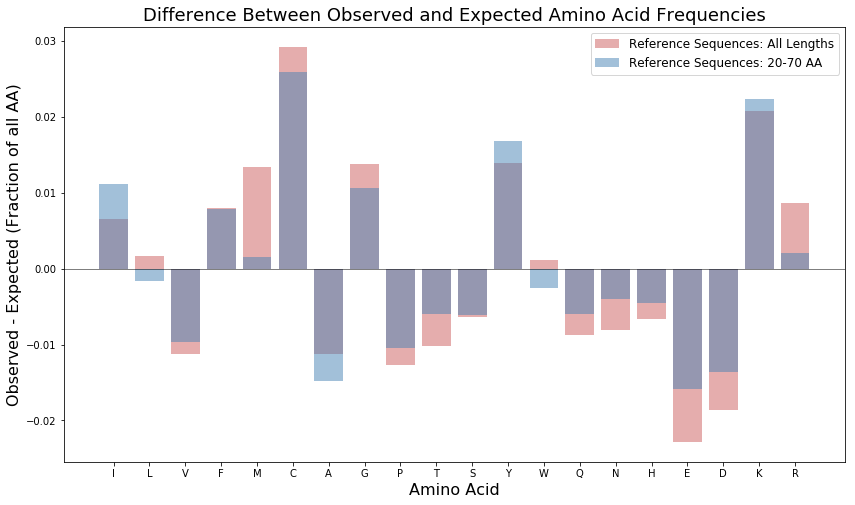

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,8))
plt.bar(x,obsMinExp_all,alpha=0.5, color = 'indianred', label="Reference Sequences: All Lengths")
plt.bar(x,obsMinExp_20to70aa,alpha=0.5,color = 'steelblue',  label="Reference Sequences: 20-70 AA")
plt.axhline(0, color='black', linewidth = '0.5')
plt.title('Difference Between Observed and Expected Amino Acid Frequencies', size = 18)
plt.xlabel('Amino Acid', size = 16)
plt.ylabel('Observed - Expected (Fraction of all AA)', size = 16)
plt.grid(alpha=0)
plt.legend(fontsize = 'large')
plt.show();
fig.savefig('obsMINexp_allLenInOne.png') 